<a href="https://colab.research.google.com/github/tarupathak30/Deep-Learning-/blob/main/cnn/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

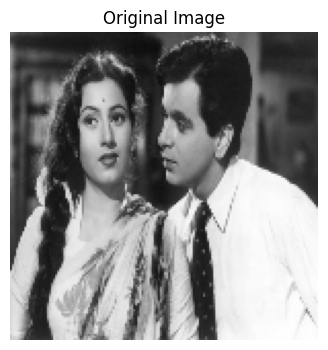

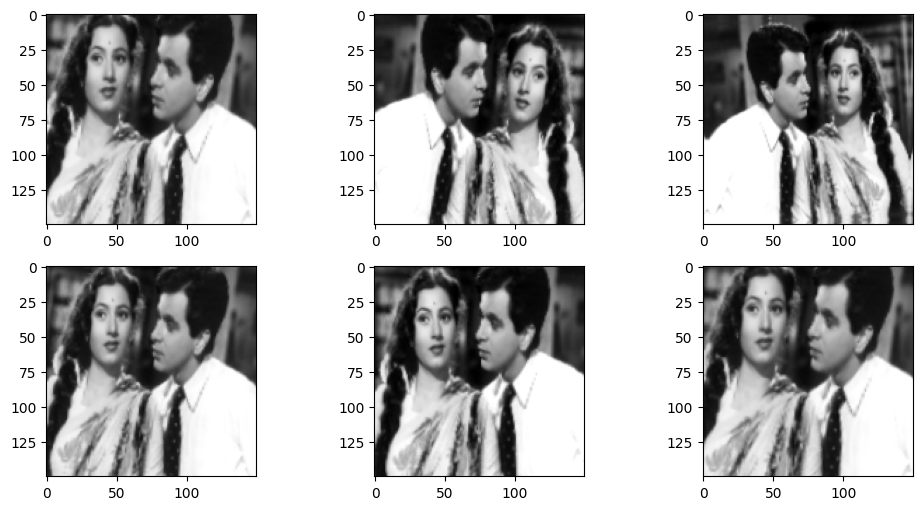

In [14]:
# load and preprocess the image
# dataset = tf.keras.utils.image_dataset_from_directory(
#     '/content/OneMore.jpg',
#     image_size=(150, 150),
#     batch_size=1
# )

image_path = '/content/madhu.jpg'

image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [150, 150])
image = image / 255.0

# defining the augmentation layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

# Display the original image
plt.figure(figsize=(4,4))
plt.imshow(image.numpy())
plt.axis('off')
plt.title("Original Image")
plt.show()


# applying augmentations multiple times and show results
plt.figure(figsize=(12, 6))

for i in range(6):
  augmented_image = data_augmentation(tf.expand_dims(image, axis=0), training=True)[0]
  augmented_image = tf.clip_by_value(augmented_image, 0.0, 1.0)
  plt.subplot(2, 3, i+1)
  plt.imshow(augmented_image.numpy())

plt.show()